In [2]:
import os
import sys
from PIL import Image
import numpy as np

**1) Read the image and scaling** 

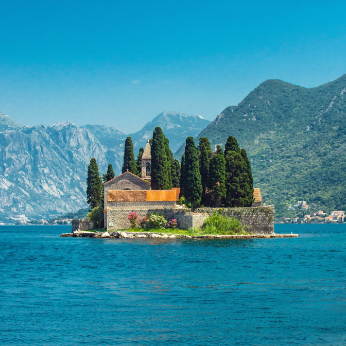

Image found with width: 346, height: 346, depth: 3


In [3]:
image = Image.open('image (1).png') # PIL gives an Image object, but our algorithm requires a NumPy array
#image = Image.open('Domestic-feline-tabby-cat.jpg') 
display(image)

image = np.asarray(image)/255        # each value is divided by 255 to scale the pixels from 0 to 1
w, h, d = image.shape
print('Image found with width: {}, height: {}, depth: {}'.format(w, h, d))

**2) Spread color space**

In [4]:
X = image.reshape((w * h, d))  # spread all pixels
# for i in X:
#     print(i)

**3) Choose randomly initial points as centroids**

In [5]:
def initialize_K_centroids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]

**4) Calculate Euclidean distance between each point and initial centroids**

In [6]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c

**5) Take the average of distance for every centroid**

In [7]:
def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

**6) Iterate until the centroids aren’t moving anymore**

In [8]:
def find_k_means(X, K, max_iters=10):
    centroids = initialize_K_centroids(X, K)  # initialize by choosing k random points
    previous_centroids = centroids  # to compare
    
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (centroids == previous_centroids).all():  # If all() differences were equal than stop
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx

**Run the application**

In [11]:
K = 20   #the desired number of colors (clusters) in the compressed image
colors, _ = find_k_means(X, K, max_iters=20)
idx = find_closest_centroids(X, colors)

**Reconstruct the image**

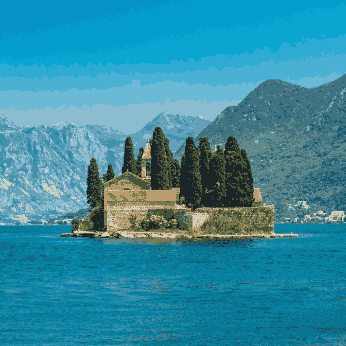

In [12]:
idx = np.array(idx, dtype=np.uint8)
X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
compressed_image = Image.fromarray(X_reconstructed)
display(compressed_image)
compressed_image.save('out.png')